170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


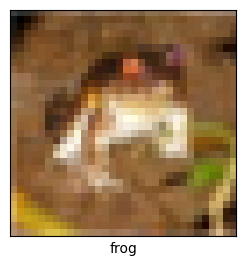

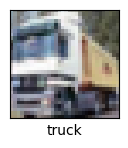

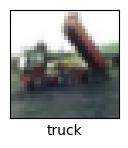

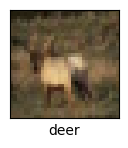

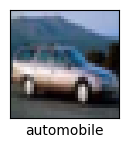

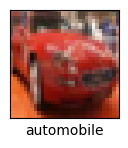

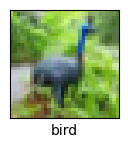

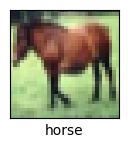

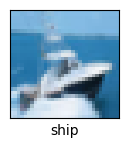

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 76s 47ms/step - accuracy: 0.3600 - loss: 1.7317 - val_accuracy: 0.5202 - val_loss: 1.2928
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 73s 47ms/step - accuracy: 0.5890 - loss: 1.1564 - val_accuracy: 0.6212 - val_loss: 1.0659
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 46ms/step - accuracy: 0.6494 - loss: 0.9963 - val_accuracy: 0.6652 - val_loss: 0.9549
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 45ms/step - accuracy: 0.6848 - loss: 0.8939 - val_accuracy: 0.6645 - val_loss: 0.9583
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 45ms/step - accuracy: 0.7114 - loss: 0.8201 - val_accuracy: 0.6884 - val_loss: 0.9264
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 73s 47ms/step - accuracy: 0.7322 - loss: 0.7654 - val_accuracy: 0.7044 - val_loss: 0.8626
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 46ms/step - accuracy: 0.7472 - loss: 0.7177 - val_accuracy: 0.7036 - val_loss: 0.8894
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 46ms/step - accuracy: 0.7625 -

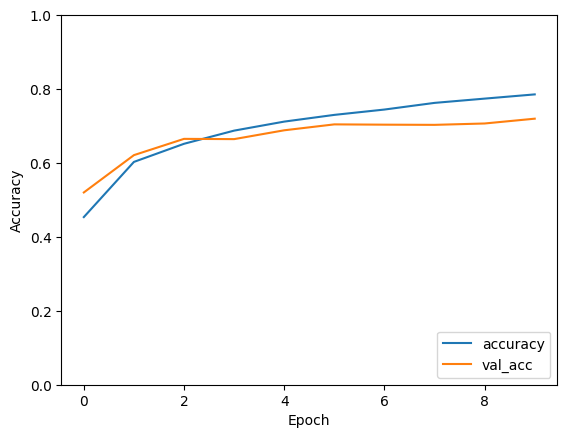

In [ ]:
#experiment 7
import tensorflow as tf # Removed leading whitespace
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
(train_images,train_labels),(test_images,test_labels) = datasets.cifar10.load_data()
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
def display_sample_images(train_images, train_labels,class_names):
 plt.figure(figsize = (10,10))
 for i in range(9):
  plt.subplot(3,3,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i])
  plt.xlabel(class_names[train_labels[i][0]])
  plt.show()
display_sample_images(train_images,train_labels,class_names)
train_images,test_images = train_images/255.0,test_images/255.0
model = models.Sequential()
def display_sample_images(train_images, train_labels,class_names):
 plt.figure(figsize = (10,10))
 for i in range(4):
  plt.subplot(2,2,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i])
  plt.xlabel(class_names[train_labels[i][0]])
  plt.show()
model.add(layers.Conv2D(32,(3,3),activation = 'relu',input_shape = (32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation = 'relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation = 'relu'))
model.add(layers.Dense(10))
model.compile(optimizer = 'adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),metrics = ['accuracy'])
history = model.fit(train_images,train_labels,epochs = 10,validation_data = (test_images,test_labels))
test_loss,test_acc = model.evaluate(test_images,test_labels,verbose = 2)
print(f'test Accuracy: {test_acc}')
plt.plot(history.history['accuracy'],label = 'accuracy')
plt.plot(history.history['val_accuracy'],label = 'val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.legend(loc = 'lower right')
plt.show()